# <center> <font color='blue'> Diabetes Prediction Model</font></center>

### <font color='red'>💻 The machine learning models used in this project are: </font> 
1. Support Vector Machine (SVM)
2. K-Nearest Neighbour (KNN)
3. Logistic Regression
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Neural Network
8. LinearDiscriminantAnalysis
9. Gradient Boosting
10. Ada Boost

<a id="0"></a>
# 📝check list:


#### [1.📚 Importing Libraries](#1)
#### [2.📂 Loading Data](#2)
#### [3.🧐 Data Wrangling](#3)
  #### _🚫 Missing Values
  #### _👁‍🗨 DataTypes
  #### _🔃 Duplicates
#### [ 4.📊 EDA](#4)
  #### _🔢 Numeric Columns
  #### _🔠 Categorical Columns
#### [5.🛠 Feature Engineering ](#5)
  #### _👨🏽‍💻 LabelEncoder 
#### [6.🔭 correlations ](#6)
#### [7.🏗 Model Building](#7)
  #### _ 🗃 Splitting Data
  ####  _Train & Test Models
#### [8.🥇 Saving The Best Model](#8)



<a id="1"></a>
# <font color='green'> 📚 Importing Libraries</font>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')


<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="2"></a>
# <font color='green'> 📂  Load Data:</font>

In [2]:
df = pd.read_csv('diabetes1.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="3"></a>
# <font color='green'> 🧐 Data Info:</font>


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [511]:
df.duplicated().sum()

3854

In [512]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="4"></a>
# <font color='green'> 📊 Exploratory Data Analysis (EDA):</font>


### 1-Numeric Columns

In [327]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,96146.0,41.794326,22.462948,0.08,24.0,43.00,59.00,80.00
hypertension,96146.0,0.077601,0.267544,0.00,0.0,0.00,0.00,1.00
heart_disease,96146.0,0.040803,0.197833,0.00,0.0,0.00,0.00,1.00
bmi,96146.0,27.321461,6.767716,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96146.0,5.532609,1.073232,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96146.0,138.218231,40.909771,80.00,100.0,140.00,159.00,300.00
diabetes,96146.0,0.088220,0.283616,0.00,0.0,0.00,0.00,1.00


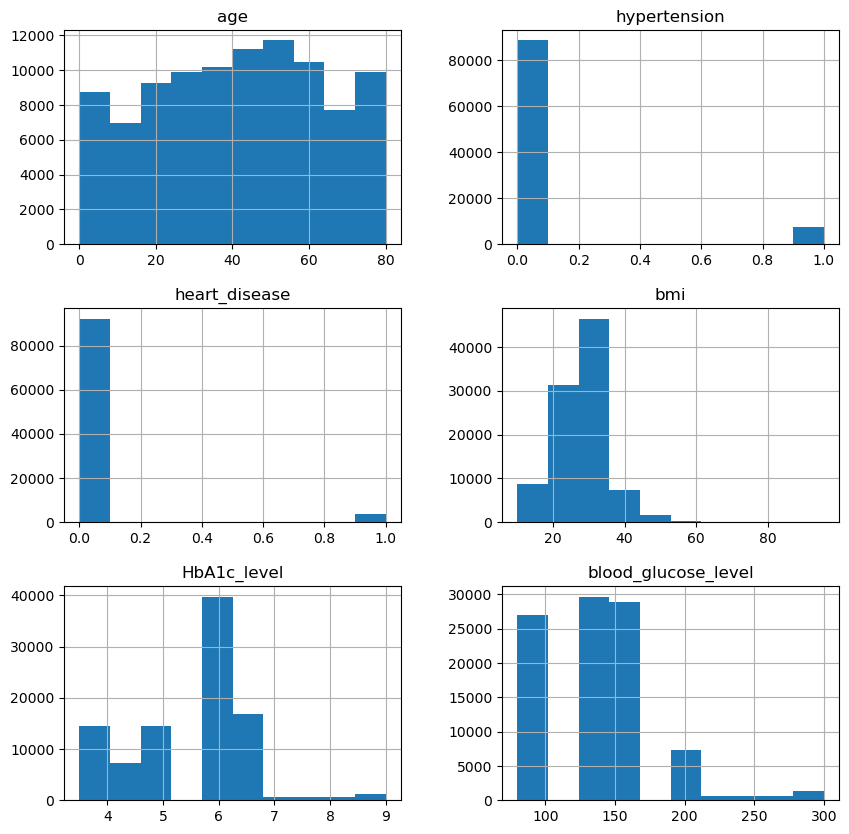

In [328]:
features = ['age', 'hypertension', 'heart_disease', 'bmi','HbA1c_level','blood_glucose_level']

df[features].hist(figsize=(10, 10));

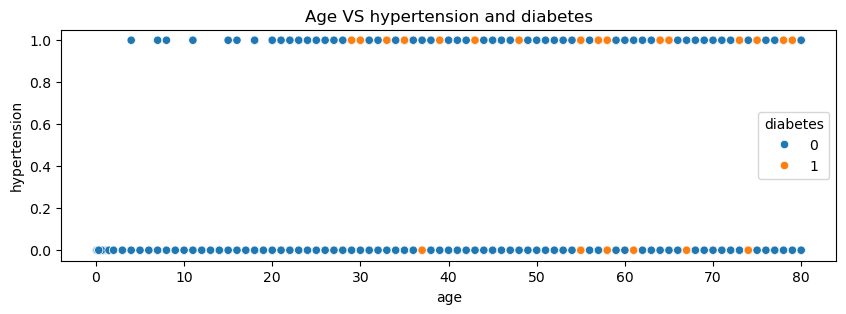

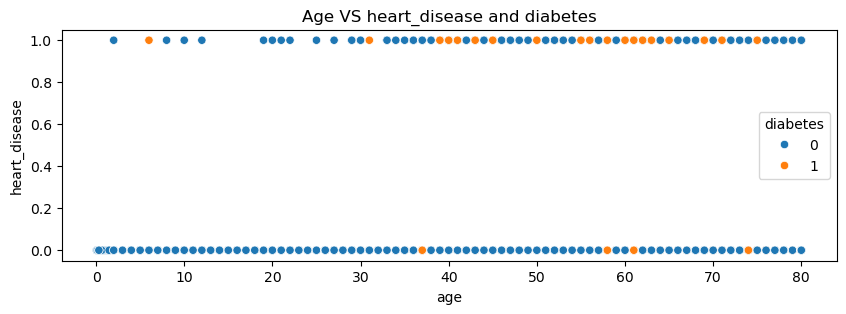

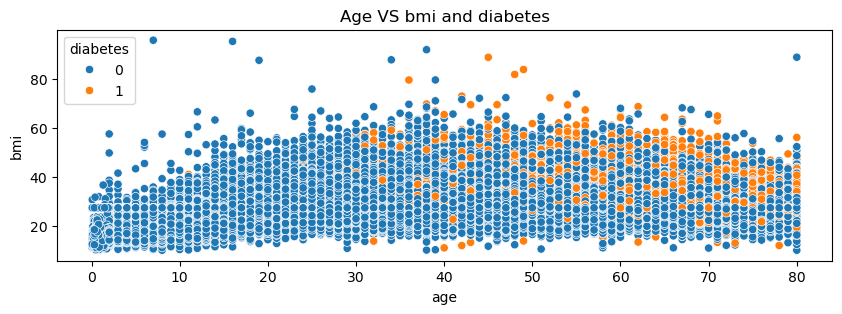

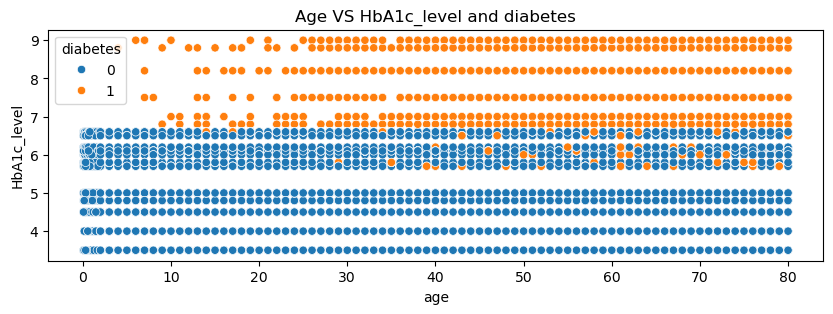

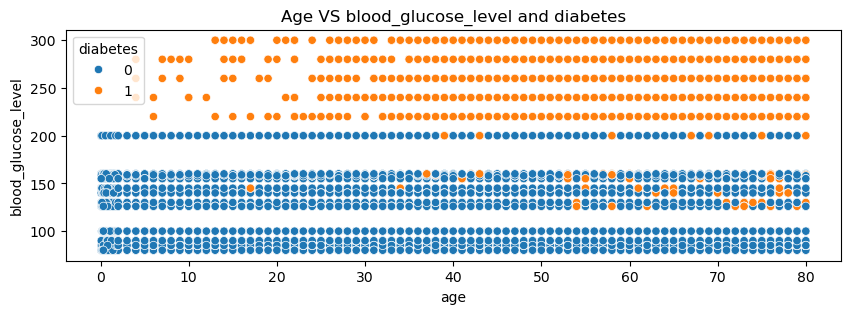

In [329]:
num_col = ['hypertension', 'heart_disease', 'bmi','HbA1c_level','blood_glucose_level']

disease_conditions = ['diabetes']

for disease in disease_conditions:
    for variable in num_col:
        plt.figure(figsize=(10, 3))
        #sns.cplot(data=df, x=variable, hue=disease, palette='magma')
        sns.scatterplot(y=variable, x='age', hue='diabetes', data=df)
        plt.title(f'Age VS {variable} and {disease}')
        
        plt.show()


### 2-Categorical Columns

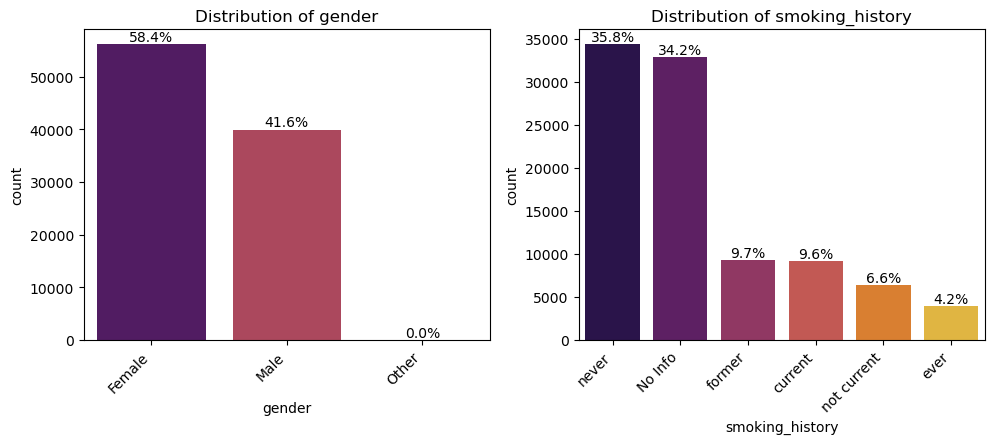

In [330]:
cat_columns = ['gender','smoking_history']

plt.figure(figsize=(15, 12))

for i, variable in enumerate(cat_columns, 1):  
    plt.subplot(3, 3, i)  # 2 rows and 2 columns
    order = df[variable].value_counts().index
    ax = sns.countplot(x=variable, data=df, order=order, palette='inferno')

    # Add percentage annotations
    total = len(df[variable])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {variable}')

plt.tight_layout()
plt.show()


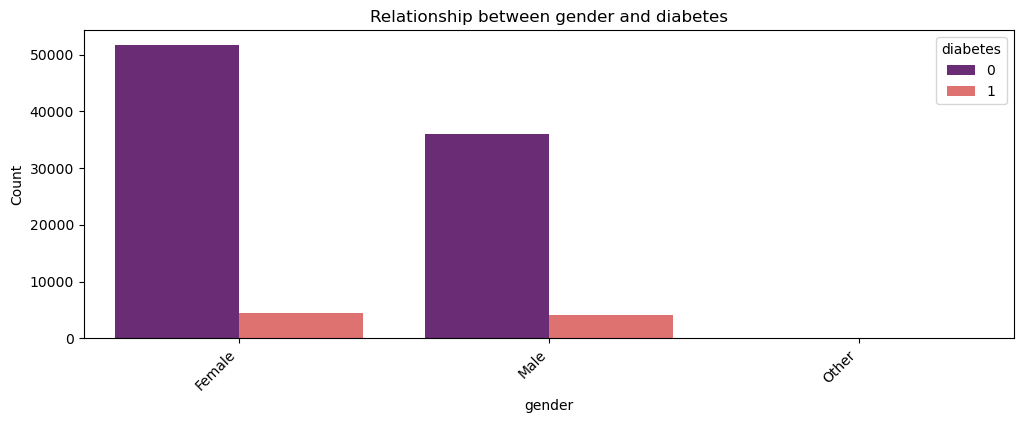

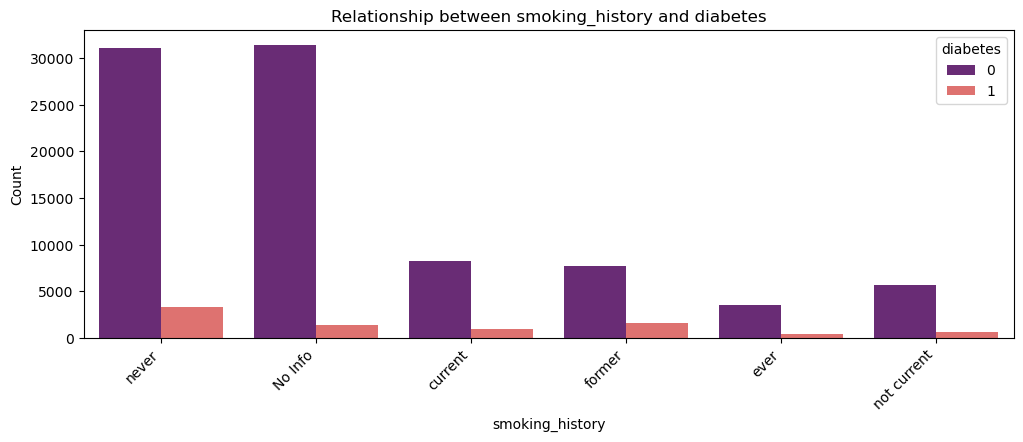

In [331]:
selected_variables =['gender','smoking_history']
disease_conditions = ['diabetes']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(12, 4))
        sns.countplot(data=df, x=variable, hue=disease, palette='magma')
        plt.title(f'Relationship between {variable} and {disease}')
        plt.xlabel(variable)
        plt.ylabel('Count')
        plt.legend(title=disease, loc='upper right')
        plt.xticks(rotation=45, ha='right')
        plt.show()


<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="5"></a>
# <font color='green'> 🛠 Feature Engineering:</font>


In [3]:
dobject= df.select_dtypes(include="object")
dnumeric= df.select_dtypes(exclude='object')

In [4]:
la= LabelEncoder()

In [5]:
for i in range(0,dobject.shape[1]):
    dobject.iloc[:,i]=la.fit_transform(dobject.iloc[:,i])

In [6]:
df=pd.concat([dobject,dnumeric],axis=1)
df['gender']=df['gender'].astype('int64')
df['smoking_history']=df['smoking_history'].astype('int64')
df['age']=df['age'].astype('int64')
df['bmi']=df['bmi'].astype('int64')
df['HbA1c_level']=df['HbA1c_level'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   gender               100000 non-null  int64
 1   smoking_history      100000 non-null  int64
 2   age                  100000 non-null  int64
 3   hypertension         100000 non-null  int64
 4   heart_disease        100000 non-null  int64
 5   bmi                  100000 non-null  int64
 6   HbA1c_level          100000 non-null  int64
 7   blood_glucose_level  100000 non-null  int64
 8   diabetes             100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB


<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="6"></a>
# <font color='green'> 🔭 Explore correlations between features:</font>


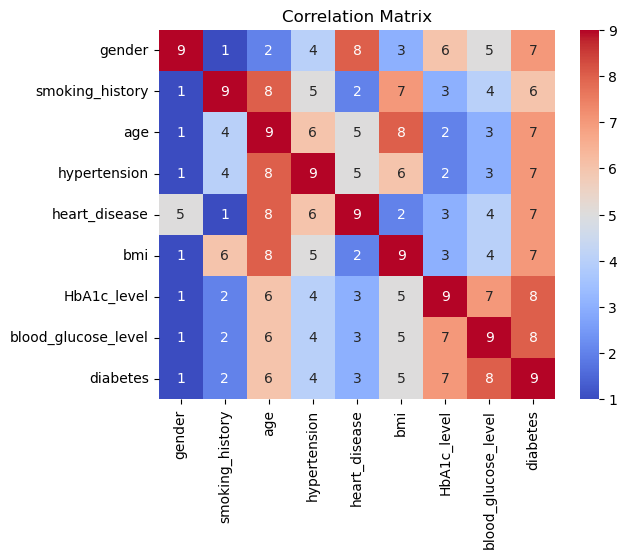

In [7]:
#plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix.rank(axis='columns'), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="7"></a>
# <font color='green'> 🏗 Model Building:</font>

In [9]:
X = df.drop(["diabetes",'HbA1c_level'], axis=1)
y = df["diabetes"]
X

,gender,smoking_history,age,hypertension,heart_disease,bmi,blood_glucose_level
0,0,4,80,0,1,25,140
1,0,0,54,0,0,27,80
2,1,4,28,0,0,27,158
3,0,1,36,0,0,23,155
4,1,1,76,1,1,20,155
...,...,...,...,...,...,...,...
99995,0,0,80,0,0,27,90
99996,0,0,2,0,0,17,100
99997,1,3,66,0,0,27,155
99998,0,4,24,0,0,35,100


In [40]:

X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2, random_state = 5 )

In [41]:
X_train.shape

(80000, 7)

In [42]:
X_test.shape

(20000, 7)

### 1) Support Vector Machine Model :-

In [13]:
svm_model= SVC()

In [14]:
svm_model.fit(X_train, y_train)

SVC()

In [15]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18252
           1       1.00      0.32      0.48      1748

    accuracy                           0.94     20000
   macro avg       0.97      0.66      0.72     20000
weighted avg       0.94      0.94      0.93     20000



### 2) K-Nearest Neighbour MODEL :-

In [47]:
knn_model= KNeighborsClassifier()

In [48]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred= knn_model.predict(X_test)
accuracy =accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18378
           1       0.77      0.44      0.56      1622

    accuracy                           0.94     20000
   macro avg       0.86      0.71      0.76     20000
weighted avg       0.94      0.94      0.94     20000



### 3) Logistic Regression MODEL :-

In [50]:
log_model= LogisticRegression()


In [51]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred= log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18378
           1       0.80      0.41      0.54      1622

    accuracy                           0.94     20000
   macro avg       0.87      0.70      0.76     20000
weighted avg       0.94      0.94      0.94     20000



### 4) Naive Bayes MODEL :-

In [22]:
nb_model= GaussianNB()

In [23]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred= nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     18252
           1       0.38      0.55      0.45      1748

    accuracy                           0.88     20000
   macro avg       0.67      0.73      0.69     20000
weighted avg       0.91      0.88      0.89     20000



### 5) Decision Tree MODEL :-

In [25]:
tree_model= tree.DecisionTreeClassifier()

In [26]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred= tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     18252
           1       0.54      0.51      0.52      1748

    accuracy                           0.92     20000
   macro avg       0.75      0.73      0.74     20000
weighted avg       0.92      0.92      0.92     20000



### 6) Random Forest MODEL :-

In [28]:
rf_model= RandomForestClassifier()

In [29]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred= rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18252
           1       0.71      0.44      0.54      1748

    accuracy                           0.94     20000
   macro avg       0.83      0.71      0.75     20000
weighted avg       0.93      0.94      0.93     20000



### 7) Neural Network MODEL :-

In [31]:
nn_model=MLPClassifier()

In [32]:
nn_model.fit(X_train, y_train)

MLPClassifier()

In [33]:
y_pred= nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18252
           1       0.94      0.37      0.53      1748

    accuracy                           0.94     20000
   macro avg       0.94      0.68      0.75     20000
weighted avg       0.94      0.94      0.93     20000



### 8) Linear Discriminant Analysis MODEL :-

In [34]:
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
y_pred= lda_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18252
           1       0.73      0.43      0.54      1748

    accuracy                           0.94     20000
   macro avg       0.84      0.71      0.75     20000
weighted avg       0.93      0.94      0.93     20000



### 9) Gradient Boosting Classifier MODEL :-

In [43]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
y_pred= gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18378
           1       0.95      0.42      0.58      1622

    accuracy                           0.95     20000
   macro avg       0.95      0.71      0.78     20000
weighted avg       0.95      0.95      0.94     20000



### 10) Ada Boost Classifier MODEL :-

In [45]:
ad_model=AdaBoostClassifier()
ad_model.fit(X_train, y_train)

AdaBoostClassifier()

In [46]:
y_pred= ad_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18378
           1       0.90      0.43      0.59      1622

    accuracy                           0.95     20000
   macro avg       0.93      0.72      0.78     20000
weighted avg       0.95      0.95      0.94     20000



<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="8"></a>
# <font color='green'> 🥇 BEST MODEL:</font>

#### As we can see Gradient Boosting Model Gives us a better accuracy.

# Save Model :

In [53]:
f_name='diabetes_disease.sav'

In [54]:
pickle.dump(gb_model,open(f_name,'wb'))
print("model saved!!!")

model saved!!!
